In [1]:
%matplotlib inline

/home/muntean/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import stats_enriched_tweets
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from mpltools import style
import numpy as np
from collections import Counter, OrderedDict
import pandas as pd
import plotly.plotly as py

filename_pre = "/home/muntean/brexit-enriched/all-brexit-with-sent_pre-lines.json"
filename_post = "/home/muntean/brexit-enriched/all-brexit-with-sent_post-lines.json"

/home/muntean/anaconda2/lib/python2.7/site-packages/mpltools/style/__init__.py:42: FutureWarning: 

    The style-sheet functionality in mpltools has been integrated into
    Matplotlib >= 1.4. This module will be removed in a future release.

    Note that style-sheets used by `matplotlib.style` use the standard
    Matplotlib rc-file syntax instead of the INI format used by `mpltools`.
    This mostly means un-quoting strings and changing '=' to ':'.


  """, FutureWarning)


In [3]:
def tweetIter(inputfile):
    """
    Iterates a JSON file containing enriches tweets
    :param inputfile: the file to iterate over
    :return:
    """
    for line in codecs.open(inputfile, "r", "utf-8"):
        try:
            tweet = json.loads(line)
        except:
            print "Couldn't parse tweet: ", line[:200]
        yield tweet

# build all dicts while reading

In [4]:
# 1. PRE and POST
# Given a file (PRE or POST): 
#    - we need daily volumes 
#    - we need country volumes

pre_tweetIndex = stats_enriched_tweets.createTweetIndex(filename_pre)
print len(pre_tweetIndex)

post_tweetIndex = stats_enriched_tweets.createTweetIndex(filename_post)
print len(post_tweetIndex)

100000
200000
231629
100000
200000
300000
400000
500000
600000
700000
800000
900000
968044


In [5]:
# 2. masks over tweet index pre
print "PRE brexit"
pre_dailyTweetsDict = stats_enriched_tweets.createDailyTweetsMask(pre_tweetIndex)
print "Daily tweets - volumes:", len(pre_dailyTweetsDict)
pre_userCountryTweetsDict = stats_enriched_tweets.createUserCountryTweetsMask(pre_tweetIndex)
print "User country tweets - volumes - EU:", len(pre_userCountryTweetsDict)


PRE brexit
Daily tweets - volumes: 6
User country tweets - volumes - EU: 49


In [6]:
for k,v in pre_dailyTweetsDict.iteritems():
    print k, len(v)

20160617 1
20160618 23677
20160619 33389
20160620 49577
20160621 55435
20160622 69550


In [7]:
for k,v in pre_userCountryTweetsDict.iteritems():
    print k, len(v)

BE 1477
FR 3268
BG 116
DK 341
VA 5
HR 66
DE 2409
HU 173
FI 430
BY 18
BA 18
RU 382
NL 1853
PT 618
NO 468
TR 507
LI 4
LV 60
LT 47
LU 105
ES 2234
RO 136
PL 374
XK 27
CH 684
GR 591
EE 77
IS 86
AL 53
IT 1303
GG 86
CZ 207
CY 215
IM 146
GB 205218
AD 1
IE 5562
GI 463
ME 10
MD 5
MC 38
RS 120
MK 27
SK 87
MT 136
SI 78
UA 185
SE 878
AT 237


In [8]:
# 2. masks over tweet index post
print "POST brexit"
post_dailyTweetsDict = stats_enriched_tweets.createDailyTweetsMask(post_tweetIndex)
print "Daily tweets - volumes:", len(post_dailyTweetsDict)

POST brexit
Daily tweets - volumes: 11


In [9]:
post_userCountryTweetsDict = stats_enriched_tweets.createUserCountryTweetsMask(post_tweetIndex)
print "User country tweets - volumes - EU:", len(post_userCountryTweetsDict)

User country tweets - volumes - EU: 52


In [10]:
for k,v in post_dailyTweetsDict.iteritems():
    print k, len(v)

20160704 42564
20160624 331895
20160625 84164
20160626 91813
20160627 130235
20160628 84284
20160629 61895
20160630 38694
20160701 39825
20160702 31806
20160703 30869


In [11]:
for k,v in post_userCountryTweetsDict.iteritems():
    print k, len(v)

BE 7806
FR 20451
BG 684
DK 2152
XK 171
HR 528
DE 19012
HU 922
FI 4126
BY 149
BA 192
RU 1970
NL 11086
PT 3796
NO 2997
TR 3391
LI 13
LV 591
LT 275
LU 696
GI 1110
RO 801
PL 2141
VA 48
CH 3339
GR 3528
EE 479
IS 679
AL 284
IT 7200
GG 375
CZ 1265
CY 1040
IM 608
GB 803490
AX 4
AD 19
IE 34117
ES 14262
ME 61
MD 26
MC 167
RS 640
FO 15
MK 240
SK 397
MT 647
SI 501
SM 16
UA 1070
SE 6441
AT 2026


# plot types

In [87]:
def plotBarWithLables(distrib, labels, title, rot=0):
    style.use('ggplot')
    plt.figure()
    ind = np.arange(len(distrib))
    the_plot = plt.bar(ind, distrib, width = 0.75, align='center', color='k', log=True)
    the_plot[5].set_color('r')
    plt.xticks(ind, labels, rotation=rot, fontsize = 10)
    plt.title(title, fontsize = 10)
    plt.ylabel('Number of tweets', fontsize = 10)
    plt.tight_layout()
    plt.xlim(xmin=-1, xmax=17)
#     plt.ylim(ymax=75000)
    plt.savefig("/home/muntean/brexit-enriched/plots/" + title.replace(" ","_") + ".pdf")
    plt.show()

In [74]:
def plotBarWithLables2Distrib(a,b, labels, title, rot=0):

    #style.use('ggplot')
    ind = np.arange(len(a))  # the x locations for the groups
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, a, width, color='k')
    rects2 = ax.bar(ind + width, b, width, color='w', edgecolor='k')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Number of tweets')
#     ax.set_title(title)
    ax.set_xticks(ind + width)
    
    ax.set_xticklabels(labels)

    plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

    ax.legend((rects1[0], rects2[0]), ('Pre-Brexit', 'Post-Brexit'), loc='upper left')
    
#     def autolabel(rects):
#         # attach some text labels
#         for rect in rects:
#             height = rect.get_height()
#             ax.text(rect.get_x() + rect.get_width() / 2., 1.05 * height,
#                     '%d' % int(height),
#                     ha='center', va='bottom')
    
#     autolabel(rects1)
#     autolabel(rects2)

#     plt.tight_layout()
    plt.savefig("/home/muntean/brexit-enriched/plots/"+ title.replace(" ","_") + ".pdf")
    plt.show()

# plots literally

#### tweets per day

In [18]:
def plotTweetsPerDay(tweetsPerDayDict1, tweetsPerDayDict2):
    tweetsPerDay1 = [[len(y), x] for x, y in tweetsPerDayDict1.items() if x is not None and len(y)>20000]
    tweetsPerDay2 = [[len(y), x] for x, y in tweetsPerDayDict2.items() if x is not None and len(y)>20000]
    print tweetsPerDay1
    print tweetsPerDay2
    
    tweetsPerDay = tweetsPerDay1 + [[288091, 20160623]] + tweetsPerDay2
    print tweetsPerDay
    
    tweetsPerDay.sort(key = lambda row: row[1])
    #print tweetsPerDay
    print "Tweets per day", len(tweetsPerDay)
    
    values = list(zip(*tweetsPerDay)[0])
    #print values
    labels = list(zip(*tweetsPerDay)[1])
    new_labels = [str(x)[4:6]+"-"+str(x)[6:] for x in labels]
    print new_labels
    #print labels
    plotBarWithLables(values, new_labels, "Number of tweets per day", rot=90)

[[23677, 20160618], [33389, 20160619], [49577, 20160620], [55435, 20160621], [69550, 20160622]]
[[42564, 20160704], [331895, 20160624], [84164, 20160625], [91813, 20160626], [130235, 20160627], [84284, 20160628], [61895, 20160629], [38694, 20160630], [39825, 20160701], [31806, 20160702], [30869, 20160703]]
[[23677, 20160618], [33389, 20160619], [49577, 20160620], [55435, 20160621], [69550, 20160622], [288091, 20160623], [42564, 20160704], [331895, 20160624], [84164, 20160625], [91813, 20160626], [130235, 20160627], [84284, 20160628], [61895, 20160629], [38694, 20160630], [39825, 20160701], [31806, 20160702], [30869, 20160703]]
Tweets per day 17
['06-18', '06-19', '06-20', '06-21', '06-22', '06-23', '06-24', '06-25', '06-26', '06-27', '06-28', '06-29', '06-30', '07-01', '07-02', '07-03', '07-04']


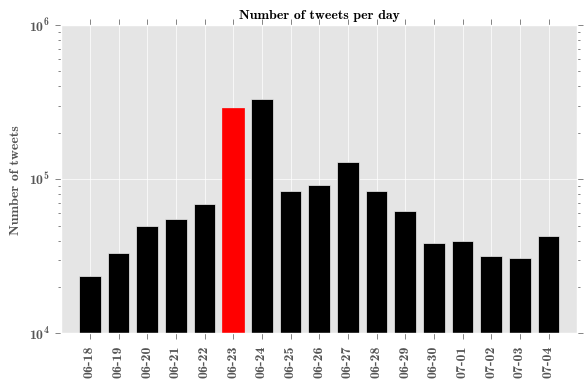

In [88]:
plotTweetsPerDay(pre_dailyTweetsDict, post_dailyTweetsDict)

#### tweets per country

In [85]:
import numpy
def plotTweetsPerCountryPrePost(pre_tweetsPerCountryDict, post_tweetsPerCountryDict):
    
    pre_tweetsPerCountry = [[len(y), x] for x, y in pre_tweetsPerCountryDict.items() if x is not None]
    post_tweetsPerCountry = [[len(y), x] for x, y in post_tweetsPerCountryDict.items() if x is not None]
    
    print pre_tweetsPerCountry
    
    #sum countries
    countryDict = defaultdict()
    for item in pre_tweetsPerCountry:
        countryDict[item[1]] = item[0] 
    for item in post_tweetsPerCountry:
        if item[1] in countryDict:
            countryDict[item[1]] += item[0]
        
    countryDictSorted = sorted(countryDict.iteritems(), key=lambda x: x[1], reverse=True)  # order by frequency
    print countryDictSorted
    
    
    labels = [x for [x,y] in countryDictSorted[:20]]
    print labels

    
    pre_freq = list()
    pre_countries = {y : x for [x,y] in pre_tweetsPerCountry}
    for country in labels:
        pre_freq.append(pre_countries[country])
    print pre_freq
    
    post_freq = list()
    post_countries = {y : x for [x,y] in post_tweetsPerCountry}
    for country in labels:
        post_freq.append(post_countries[country])
    print post_freq

    labels[0] = u"UK"  # ok????
    print labels
    plotBarWithLables2Distrib(numpy.log10(pre_freq), numpy.log10(post_freq), labels, "tweets_per_Country_pre_post_log_scale", rot=90)
    plotBarWithLables2Distrib(pre_freq, post_freq, labels, "tweets_per_Country_pre_post", rot=90)

[[1477, u'BE'], [3268, u'FR'], [116, u'BG'], [341, u'DK'], [5, u'VA'], [66, u'HR'], [2409, u'DE'], [173, u'HU'], [430, u'FI'], [18, u'BY'], [18, u'BA'], [382, u'RU'], [1853, u'NL'], [618, u'PT'], [468, u'NO'], [507, u'TR'], [4, u'LI'], [60, u'LV'], [47, u'LT'], [105, u'LU'], [2234, u'ES'], [136, u'RO'], [374, u'PL'], [27, u'XK'], [684, u'CH'], [591, u'GR'], [77, u'EE'], [86, u'IS'], [53, u'AL'], [1303, u'IT'], [86, u'GG'], [207, u'CZ'], [215, u'CY'], [146, u'IM'], [205218, u'GB'], [1, u'AD'], [5562, u'IE'], [463, u'GI'], [10, u'ME'], [5, u'MD'], [38, u'MC'], [120, u'RS'], [27, u'MK'], [87, u'SK'], [136, u'MT'], [78, u'SI'], [185, u'UA'], [878, u'SE'], [237, u'AT']]
[(u'GB', 1008708), (u'IE', 39679), (u'FR', 23719), (u'DE', 21421), (u'ES', 16496), (u'NL', 12939), (u'BE', 9283), (u'IT', 8503), (u'SE', 7319), (u'FI', 4556), (u'PT', 4414), (u'GR', 4119), (u'CH', 4023), (u'TR', 3898), (u'NO', 3465), (u'PL', 2515), (u'DK', 2493), (u'RU', 2352), (u'AT', 2263), (u'GI', 1573), (u'CZ', 1472), (u

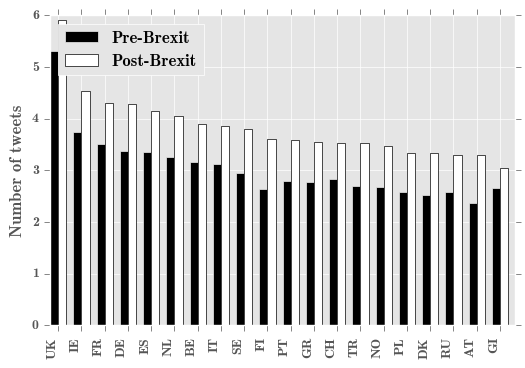

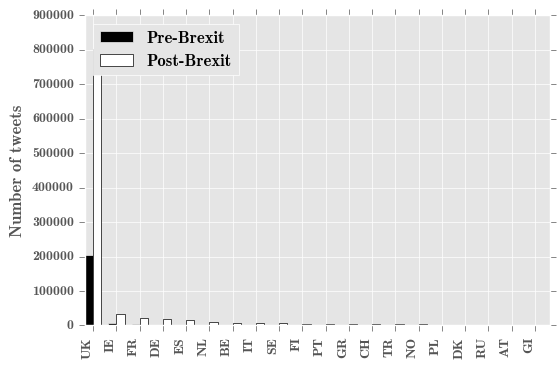

In [86]:
plotTweetsPerCountryPrePost(pre_userCountryTweetsDict, post_userCountryTweetsDict)

In [89]:
def top20countryMentions(dailyTweetsDict, tweetIndex):   
    # order chrono
    sortedDailyTweetsDict = sorted(x for x,k in dailyTweetsDict.iteritems() if len(k)>20000)
    # print len(sortedDailyTweetsDict)
    
    countryMentions = list()
    for day, tweetList in dailyTweetsDict.iteritems():
        if day in sortedDailyTweetsDict:
            for tweet_id in tweetList:
                mentions = tweetIndex[tweet_id]["ht"]  #list
                for mention in mentions:
                    countryMentions.append(mention)
    #topCountryMentions = Counter(countryMentions).most_common(20)
    topCountryMentions = Counter(countryMentions).most_common()
    
    return topCountryMentions

In [169]:
### be aware of the difference between MENTIONS IN TEXT and HASHTAGS IN HASHTAG LIST
politicians = ["david cameron", "theresa may", "nigel farage", "boris johnson", "david davis", "joe cox", 
               "jeremy corbyn", "george osborne", "nicola sturgeon"]
politician_ht = ["marr", "jocox", "cameron", "peston", "farage", "borisjohnson", "corbyn"]
parties = ["ukip", "labour", "tories"]

In [90]:
#### hashtags
pre_top20CountryMentions = top20countryMentions(pre_dailyTweetsDict, pre_tweetIndex)
print len(pre_top20CountryMentions)

post_top20CountryMentions = top20countryMentions(post_dailyTweetsDict, post_tweetIndex)
print len(post_top20CountryMentions)

15158
37832


In [220]:
for k,v in enumerate(pre_top20CountryMentions[:100]):
    print k,v
pre_top_20 = [x for [x,y] in pre_top20CountryMentions[:20]]
print pre_top_20

0 (u'euref', 28222)
1 (u'brexit', 27899)
2 (u'voteleave', 24219)
3 (u'remain', 13058)
4 (u'voteremain', 10204)
5 (u'bbcdebate', 9690)
6 (u'strongerin', 7110)
7 (u'eu', 5467)
8 (u'eureferendum', 4351)
9 (u'uk', 4238)
10 (u'leave', 3693)
11 (u'bbcqt', 3149)
12 (u'euro2016', 2882)
13 (u'eng', 2611)
14 (u'leaveeu', 2105)
15 (u'c4debate', 1926)
16 (u'takecontrol', 1846)
17 (u'labourinforbritain', 1795)
18 (u'inorout', 1725)
19 (u'engslo', 978)
20 (u'projecthope', 835)
21 (u'news', 825)
22 (u'marr', 764)
23 (u'votein', 725)
24 (u'referendum', 706)
25 (u'catsagainstbrexit', 701)
26 (u'bremain', 679)
27 (u'ukip', 638)
28 (u'jocoxmp', 568)
29 (u'bbc', 556)
30 (u'london', 555)
31 (u'wal', 549)
32 (u'labour', 528)
33 (u'greenerin', 502)
34 (u'england', 482)
35 (u'nhs', 456)
36 (u'takebackcontrol', 454)
37 (u'tomorrowspaperstoday', 432)
38 (u'intogether', 422)
39 (u'labourin', 415)
40 (u'britain', 413)
41 (u'football', 406)
42 (u'betteroffout', 405)
43 (u'rt', 394)
44 (u'lexit', 390)
45 (u'davidca

In [221]:
for k,v in enumerate(post_top20CountryMentions[:100]):
    print k,v
post_top_20 = [x for [x,y] in post_top20CountryMentions[:20]]
print post_top_20

0 (u'brexit', 139974)
1 (u'euref', 64431)
2 (u'eurefresults', 42194)
3 (u'keepcorbyn', 14385)
4 (u'eu', 11861)
5 (u'uk', 10368)
6 (u'leave', 8908)
7 (u'remain', 8728)
8 (u'eureferendum', 8521)
9 (u'euro2016', 8240)
10 (u'corbyn', 6575)
11 (u'indyref2', 5633)
12 (u'engice', 4984)
13 (u'voteleave', 4839)
14 (u'eng', 4700)
15 (u'labourcoup', 3400)
16 (u'borisjohnson', 2765)
17 (u'notmyvote', 2742)
18 (u'toryleadership', 2548)
19 (u'labour', 2506)
20 (u'news', 2479)
21 (u'brexitvote', 2472)
22 (u'farage', 2311)
23 (u'pmqs', 2155)
24 (u'ukip', 2146)
25 (u'voteremain', 2110)
26 (u'referendum', 2022)
27 (u'london', 1877)
28 (u'marchforeurope', 1855)
29 (u'marr', 1849)
30 (u'scotland', 1830)
31 (u'engisl', 1774)
32 (u'corbynout', 1735)
33 (u'isl', 1632)
34 (u'england', 1622)
35 (u'corbynstays', 1585)
36 (u'whathavewedone', 1540)
37 (u'bbcqt', 1456)
38 (u'nhs', 1450)
39 (u'cameron', 1412)
40 (u'strongerin', 1339)
41 (u'iran', 1238)
42 (u'newsnight', 1216)
43 (u'breaking', 1044)
44 (u'europe', 1

In [196]:
top20intersect = set(pre_top_20).intersection(set(post_top_20))
print top20intersect
top20intersect.add(u'voteremain')
top20intersect.add(u'strongerin')
top20intersect.add(u'takecontrol')
top20intersect.add(u'inorout')
top20intersect.remove(u'eng')
top20intersect.remove(u'eu')
top20intersect.remove(u'uk')
print top20intersect

partial_ht = [u'voteleave', u'voteremain', u'leave', u'remain']

set([u'voteleave', u'euro2016', u'brexit', u'euref', u'eureferendum', u'eng', u'leave', u'remain', u'uk', u'eu'])
set([u'voteleave', u'euro2016', u'brexit', u'euref', u'eureferendum', u'strongerin', u'voteremain', u'leave', u'remain', u'takecontrol', u'inorout'])


In [209]:
def mentionsPerDay(dailyTweetsDict, tweetIndex, mentions):
    # order chrono
    sortedDailyTweetsDict = sorted(x for x,k in dailyTweetsDict.iteritems() if len(k)>20000)
    #print sortedDailyTweetsDict
    
    dailyMentions = dict() 
    for day, tweetList in dailyTweetsDict.iteritems():
        mentionsList = list()
        if day in sortedDailyTweetsDict:
            for tweet_id in tweetList:
                tweetText = tweetIndex[tweet_id]["text"].lower()  #string
                hashtagList = tweetIndex[tweet_id]["ht"]  #string
                for mention in mentions:
                    if mention in hashtagList:
                        mentionsList.append(mention)
            topMentions = Counter(mentionsList).most_common()
            #print topMentions
            orderedTopMentions = sorted(topMentions, key=lambda tup: tup[0])
            #print orderedTopMentions
            dailyMentions[day] = orderedTopMentions
            
    # orderd date keys chronologically
    sortedDailyMentions = OrderedDict(sorted(dailyMentions.items(), key=lambda t: t[0]))
    return sortedDailyMentions

# #### top hashtags pre and post
# pre_dailyMentionDict = mentionsPerDay(pre_dailyTweetsDict, pre_tweetIndex, top20intersect)
# print pre_dailyMentionDict.keys()
# print pre_dailyMentionDict[20160619]
# print pre_dailyMentionDict[20160620]


# post_dailyMentionDict = mentionsPerDay(post_dailyTweetsDict, post_tweetIndex, top20intersect)
# print post_dailyMentionDict.keys()
# print post_dailyMentionDict[20160624]
# print post_dailyMentionDict[20160629]

# #### top parties pre and post

# pre_dailyMentionDict = mentionsPerDay(pre_dailyTweetsDict, pre_tweetIndex, parties)
# print pre_dailyMentionDict.keys()
# print pre_dailyMentionDict[20160619]
# print pre_dailyMentionDict[20160620]


# post_dailyMentionDict = mentionsPerDay(post_dailyTweetsDict, post_tweetIndex, parties)
# print post_dailyMentionDict.keys()
# print post_dailyMentionDict[20160624]
# print post_dailyMentionDict[20160629]

### top politicians pre and post: politician_ht or politicians

pre_dailyMentionDict = mentionsPerDay(pre_dailyTweetsDict, pre_tweetIndex, politician_ht)
print pre_dailyMentionDict.keys()
print pre_dailyMentionDict[20160619]
print pre_dailyMentionDict[20160620]


post_dailyMentionDict = mentionsPerDay(post_dailyTweetsDict, post_tweetIndex, politician_ht)
print post_dailyMentionDict.keys()
print post_dailyMentionDict[20160624]
print post_dailyMentionDict[20160629]


[20160618, 20160619, 20160620, 20160621, 20160622]
[('borisjohnson', 20), ('cameron', 100), ('corbyn', 55), ('farage', 74), ('jocox', 51), ('marr', 708), ('peston', 366)]
[('borisjohnson', 23), ('cameron', 69), ('corbyn', 59), ('farage', 86), ('jocox', 63), ('marr', 33), ('peston', 4)]
[20160624, 20160625, 20160626, 20160627, 20160628, 20160629, 20160630, 20160701, 20160702, 20160703, 20160704]
[('borisjohnson', 344), ('cameron', 707), ('corbyn', 705), ('farage', 393), ('jocox', 57), ('marr', 2), ('peston', 3)]
[('borisjohnson', 109), ('cameron', 108), ('corbyn', 779), ('farage', 94), ('jocox', 10), ('marr', 5)]


In [218]:
#### line plots
def plotLines(dailyMentionDict, variables, plotname):
    
    # http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/
    # Now that the plot is prepared, it's time to actually plot the data!    
    # Note that I plotted the majors in order of the highest % in the final year.    
#     majors = ['Syria', 'Iran', 'United Kingdom', 'Iraq',    
#               'Germany', 'Hungary', 'Israel',    
#               'Ivory Coast', 'Russia', 'Nigeria',    
#               'Turkey', 'Yemen', 'India',    
#               'France', 'Greece', 'Libya',    
#               'Austria', 'Italy', 'China', 'Lebanon'] 

#     majors = ["Croatia", "Hungary", "Austria", "Germany", "Serbia", "Macedonia", "Greece", "United Kingdom"]
    
    majors_alpha = sorted(variables) # 20 countries
    ind = range(len(majors_alpha)) # 0:19
    days = dailyMentionDict.keys() # 0:29

  
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(tableau20)):    
        r, g, b = tableau20[i]    
        tableau20[i] = (r / 255., g / 255., b / 255.)    

    # You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
    # exception because of the number of lines being plotted on it.    
    # Common sizes: (10, 7.5) and (12, 9)    
    country_lines = plt.figure()#figsize=(12, 14))    

    # Remove the plot frame lines. They are unnecessary chartjunk.    
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)    

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    # Ticks on the right and top of the plot are generally unnecessary chartjunk.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()    

#     Limit the range of the plot to only where the data is.    
#     Avoid unnecessary whitespace.    
    plt.ylim(10, 1000)    
#     plt.xlim(-1, 6)    

    # Make sure your axis ticks are large enough to be easily read.    
    # You don't want your viewers squinting to read your plot.    
#     plt.yticks(range(0, 13000, 1000), [str(x) for x in range(0, 13000, 1000)], fontsize=10)  
    new_days = [str(x)[4:6]+"-"+str(x)[6:] for x in days]
    plt.xticks(range(30), new_days, fontsize=10, rotation=90)
    
    ### devo iterare il dizionario in modo verticale
    for rank, mention in enumerate(variables):           
        mentionValues = list()
        for day in days:
            mentionsFreq = {x : y for [x, y] in dailyMentionDict[day]}
            mentionValues.append(0 if mention not in mentionsFreq else mentionsFreq[mention])
        
        data = np.array(mentionValues)
        print data

        plt.plot(range(len(data)), data,lw=2.5, color=tableau20[rank], label = " ".join([x.capitalize() for x in mention.split()]))  
        
#     plt.legend(loc='upper left')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
          ncol=3, fancybox=True, shadow=True)
    plt.ylabel("Number of tweets")
    plt.savefig(plotname)
    plt.show()

[ 10 708  33  10   3]
[116  51  63  35  83]
[ 39 100  69  60  68]
[  1 366   4   3   0]
[35 74 86 35 46]
[  9  20  23  81 148]
[13 55 59 19 19]


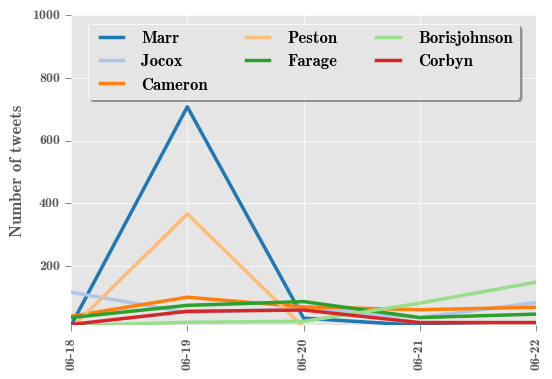

In [219]:
plotLines(pre_dailyMentionDict, politician_ht, "/home/muntean/brexit-enriched/plots/politician_ht_mentions_pre.pdf")

## mentions and sentiments

In [ ]:
mentionSentiIndex = stats_enriched_tweets.buildCountrySentiIndexMention(filename)

In [ ]:
def plotCountrySentimentPerDay(dailySentiDict, countryName, days): #, generic_title):
    labels = list()
    against = list()
    pro = list()

    dailySentiDictSorted = sorted(dailySentiDict.iteritems(), key=lambda x: x[0])  # order by date
    for record in dailySentiDictSorted:
        day = record[0]
        if day in days:
            sentiList = record[1]
            labels.append(day)
            count_pro = sentiList.count(1)
            pro.append(count_pro)
            count_anti = sentiList.count(0)
            against.append(count_anti)
    new_labels = [str(x)[4:6]+"-"+str(x)[6:] for x in labels]
    plotBarWithLables2Distrib(against, pro, new_labels, countryName.capitalize() + "_sentiment_per_Day", rot=90)

days = dailyMentionDict.keys()   
print len(days)
# plotCountrySentimentPerDay(mentionSentiIndex["syria"], "syria", days)
# plotCountrySentimentPerDay(mentionSentiIndex["france"], "france", days)
# plotCountrySentimentPerDay(mentionSentiIndex["germany"], "germany", days)
plotCountrySentimentPerDay(mentionSentiIndex["austria"], "austria", days)
# plotCountrySentimentPerDay(mentionSentiIndex["united kingdom"], "united kingdom", days)
# plotCountrySentimentPerDay(mentionSentiIndex["nigeria"], "nigeria", days)
# #http://www.voanews.com/media/photogallery/europe-migrant-crisis-september-16-2015/2966005.html
# #08.09:http://www.theguardian.com/world/video/2015/sep/08/journalist-appears-to-kick-and-trip-fleeing-refugees-video
# plotCountrySentimentPerDay(mentionSentiIndex["hungary"], "hungary", days)
# plotCountrySentimentPerDay(mentionSentiIndex["greece"], "greece", days)
# plotCountrySentimentPerDay(mentionSentiIndex["serbia"], "serbia", days)
# plotCountrySentimentPerDay(mentionSentiIndex["macedonia"], "macedonia", days)
# plotCountrySentimentPerDay(mentionSentiIndex["croatia"], "croatia", days)
# plotCountrySentimentPerDay(mentionSentiIndex["turkey"], "turkey", days)

## location mentions and uniq user sentiment


In [ ]:
mixedMentionUser = stats_enriched_tweets.buildMixCountryMentionUserSenti(filename)

In [ ]:
plotCountrySentimentPerDay(mixedMentionUser["france"], "france", days, " mention and user sentiment per day")
plotCountrySentimentPerDay(mentionSentiIndex["france"], "france", days, " mention and tweet sentiment per day")

In [ ]:
print mixedMentionUser["germany"][20150917].count(0)
print mentionSentiIndex["germany"][20150917].count(0)

In [ ]:
print mixedMentionUser["germany"][20150917].count(1)
print mentionSentiIndex["germany"][20150917].count(1)